In [ ]:
##------------------------------> Atharva Chaudhari <-------------------------------------------------------------------

In [214]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [124]:
vacci=pd.read_csv("h1n1_vaccine_prediction.csv")

In [125]:
vacci.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [126]:
vacci.shape

(26707, 34)

In [127]:
vacci.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [128]:
vacci.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [129]:
vacci.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [130]:
vacci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [131]:
vacci.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [132]:
vacci.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
14964,14964,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
21944,21944,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Hispanic,Female,"> $75,000",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,0
6469,6469,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,0
25356,25356,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0,0
13626,13626,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",0.0,0.0,0


In [133]:
vacci.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

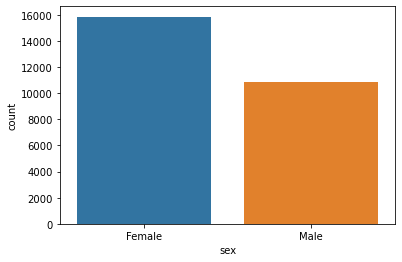

In [134]:
sns.countplot(x='sex',data=vacci)
plt.show()

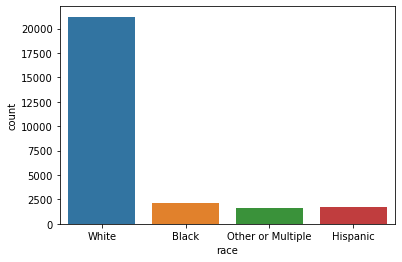

In [135]:
sns.countplot(x="race",data=vacci)
plt.show()

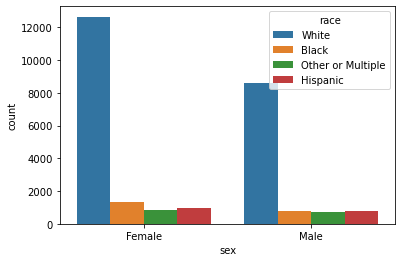

In [136]:
sns.countplot(x="sex",hue="race",data=vacci)
plt.show()

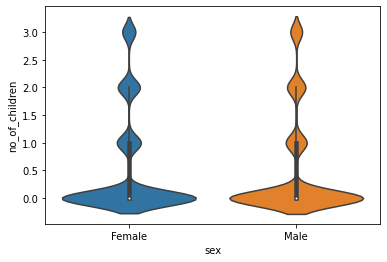

In [137]:
sns.violinplot(x="sex",y="no_of_children",data=vacci)
plt.show()

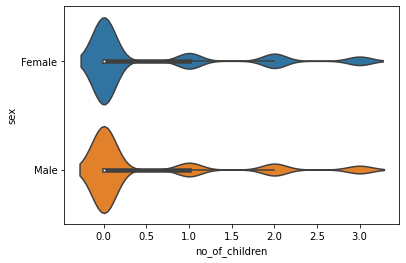

In [138]:
sns.violinplot(x="no_of_children",y="sex",data=vacci)
plt.show()

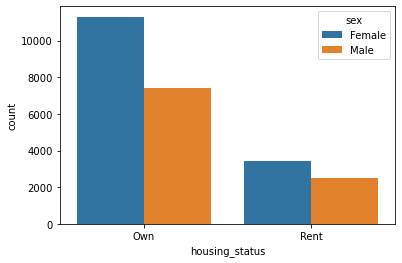

In [139]:
sns.countplot(x="housing_status",hue="sex",data=vacci)
plt.show()

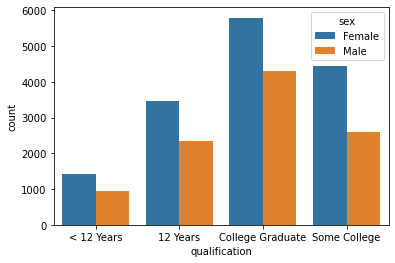

In [140]:
sns.countplot(x='qualification',hue='sex',data=vacci)
plt.show()

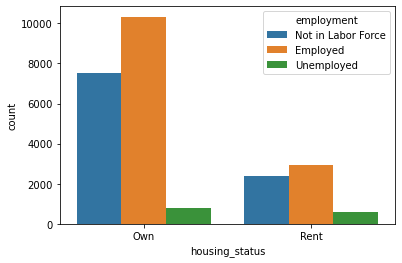

In [141]:
sns.countplot(x='housing_status',hue='employment',data=vacci)
plt.show()

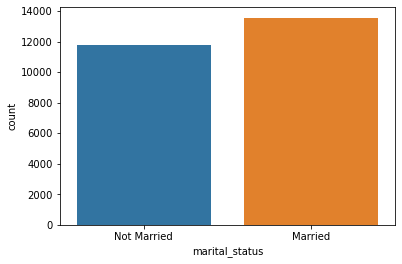

In [142]:
sns.countplot(x='marital_status',data=vacci)
plt.show()

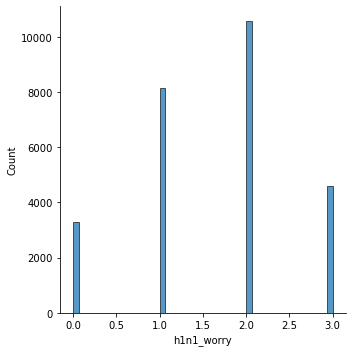

In [143]:
sns.displot(x='h1n1_worry',data=vacci)
plt.show()

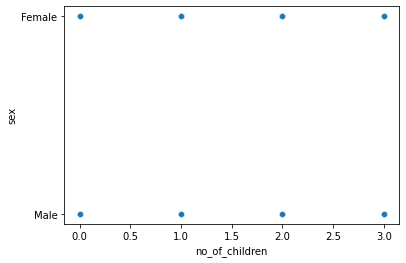

In [144]:
sns.scatterplot(x="no_of_children",y="sex",data=vacci)
plt.show()

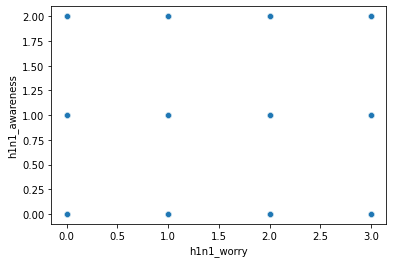

In [145]:
sns.scatterplot(x='h1n1_worry',y='h1n1_awareness',data=vacci)
plt.show()

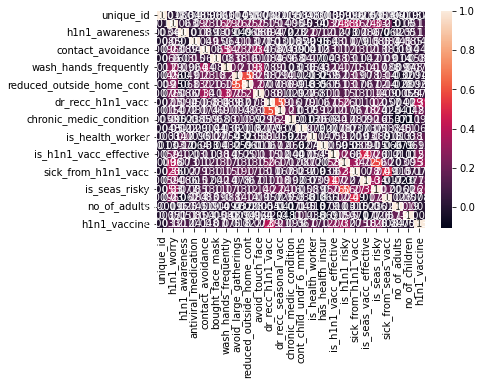

In [146]:
# Compute The correlation matrix
corr_matrix=vacci.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix,annot=True)

plt.show()

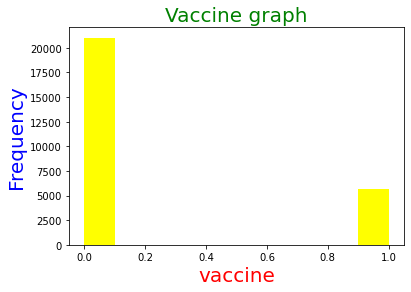

In [147]:
plt.hist(x=vacci["h1n1_vaccine"],color="yellow")
plt.title("Vaccine graph",fontsize=20,color="green")
plt.xlabel("vaccine",fontsize=20,color="red")
plt.ylabel("Frequency",fontsize=20,color="blue")
plt.show()

In [148]:
vacci.shape

(26707, 34)

In [149]:
g=vacci[vacci.duplicated()]
print(g.shape)

(0, 34)


In [150]:
vacci.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [151]:
vacci.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [152]:
vacci.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [153]:
mode_1=vacci["qualification"].mode().values[0]
vacci["qualification"]=vacci["qualification"].replace(np.nan,mode_1)

In [154]:
mode_2=vacci["income_level"].mode().values[0]
mode_2
vacci["income_level"]=vacci["income_level"].replace(np.nan,mode_2)

In [155]:
mode_3=vacci["marital_status"].mode().values[0]
mode_3
vacci["marital_status"]=vacci["marital_status"].replace(np.nan,mode_3)

In [156]:
mode_4=vacci["housing_status"].mode().values[0]
vacci["housing_status"]=vacci["housing_status"].replace(np.nan,mode_4)

In [157]:
mode_5=vacci["employment"].mode().values[0]
vacci["employment"]=vacci["employment"].replace(np.nan,mode_5)

In [158]:
median_2=vacci["no_of_children"].median()
vacci["no_of_children"]=vacci["no_of_children"].replace(np.nan,median_2)

In [159]:
vacci.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [161]:
median_3=vacci["h1n1_worry"].median()
vacci["h1n1_worry"]=vacci["h1n1_worry"].replace(np.nan,median_3)

median_4=vacci["h1n1_awareness"].median()
vacci["h1n1_awareness"]=vacci["h1n1_awareness"].replace(np.nan,median_4)

median_5=vacci["antiviral_medication"].median()
vacci["antiviral_medication"]=vacci["antiviral_medication"].replace(np.nan,median_5)

median_6=vacci["contact_avoidance"].median()
vacci["contact_avoidance"]=vacci["contact_avoidance"].replace(np.nan,median_6)

median_7=vacci["bought_face_mask"].median()
vacci["bought_face_mask"]=vacci["bought_face_mask"].replace(np.nan,median_7)

median_8=vacci["wash_hands_frequently"].median()
vacci["wash_hands_frequently"]=vacci["wash_hands_frequently"].replace(np.nan,median_8)

median_9=vacci["avoid_large_gatherings"].median()
vacci["avoid_large_gatherings"]=vacci["avoid_large_gatherings"].replace(np.nan,median_9)

median_10=vacci["reduced_outside_home_cont"].median()
vacci["reduced_outside_home_cont"]=vacci["reduced_outside_home_cont"].replace(np.nan,median_10)

median_11=vacci["avoid_touch_face"].median()
vacci["avoid_touch_face"]=vacci["avoid_touch_face"].replace(np.nan,median_11)

median_12=vacci["dr_recc_h1n1_vacc"].median()
vacci["dr_recc_h1n1_vacc"]=vacci["dr_recc_h1n1_vacc"].replace(np.nan,median_12)

median_13=vacci["dr_recc_seasonal_vacc"].median()
vacci["dr_recc_seasonal_vacc"]=vacci["dr_recc_seasonal_vacc"].replace(np.nan,median_13)

median_14=vacci["chronic_medic_condition"].median()
vacci["chronic_medic_condition"]=vacci["chronic_medic_condition"].replace(np.nan,median_14)

median_15=vacci["cont_child_undr_6_mnths"].median()
vacci["cont_child_undr_6_mnths"]=vacci["cont_child_undr_6_mnths"].replace(np.nan,median_15)

median_16=vacci["is_health_worker"].median()
vacci["is_health_worker"]=vacci["is_health_worker"].replace(np.nan,median_16)

median_17=vacci["has_health_insur"].median()
vacci["has_health_insur"]=vacci["has_health_insur"].replace(np.nan,median_17)

median_18=vacci["is_h1n1_vacc_effective"].median()
vacci["is_h1n1_vacc_effective"]=vacci["is_h1n1_vacc_effective"].replace(np.nan,median_18)

median_19=vacci["is_seas_risky"].median()
vacci["is_seas_risky"]=vacci["is_seas_risky"].replace(np.nan,median_19)

median_20=vacci["sick_from_h1n1_vacc"].median()
vacci["sick_from_h1n1_vacc"]=vacci["sick_from_h1n1_vacc"].replace(np.nan,median_20)

median_21=vacci["is_seas_vacc_effective"].median()
vacci["is_seas_vacc_effective"]=vacci["is_seas_vacc_effective"].replace(np.nan,median_21)

median_22=vacci["is_seas_risky"].median()
vacci["is_seas_risky"]=vacci["is_seas_risky"].replace(np.nan,median_22)


median_23=vacci["sick_from_seas_vacc"].median()
vacci["sick_from_seas_vacc"]=vacci["sick_from_seas_vacc"].replace(np.nan,median_23)

In [162]:
vacci.isnull().sum()

unique_id                      0
h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                388
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                  0
sick_from_seas_vacc            0
age_bracket                    0
qualification                  0
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa

In [163]:
median_24=vacci["is_h1n1_risky"].median()
vacci["is_h1n1_risky"]=vacci["is_h1n1_risky"].replace(np.nan,median_24)

In [165]:
median_25=vacci["no_of_adults"].median()
vacci["no_of_adults"]=vacci["no_of_adults"].replace(np.nan,median_25)

In [166]:
vacci.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [169]:
vac=vacci.copy()

In [167]:
vacci.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [173]:
## Encoding
vacci=pd.get_dummies(data=vacci,columns=["age_bracket",'qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa'])

In [175]:
vac=vacci.copy()

In [177]:
vac=vac.drop("unique_id",axis=1)

In [179]:
vac.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,1,0,0,1,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,1,1,0,0,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,1,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,1,0,0


In [180]:
vac.dtypes

h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


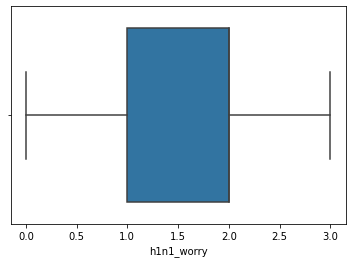

In [182]:
sns.boxplot(x="h1n1_worry",data=vac)
plt.show()

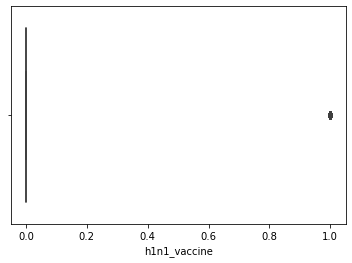

In [183]:
sns.boxplot(x="h1n1_vaccine",data=vac)
plt.show()

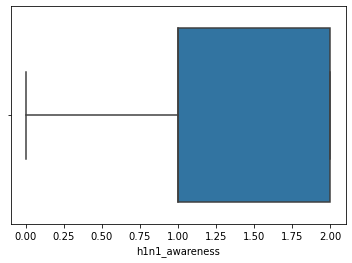

In [186]:
sns.boxplot(x="h1n1_awareness",data=vac)
plt.show()

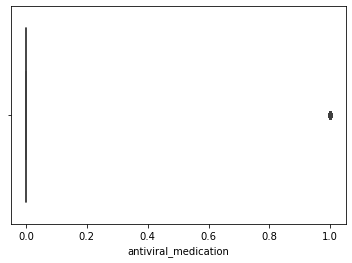

In [187]:
sns.boxplot(x="antiviral_medication",data=vac)
plt.show()

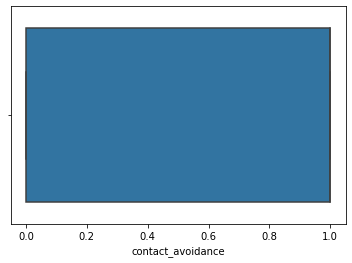

In [188]:
sns.boxplot(x="contact_avoidance",data=vac)
plt.show()

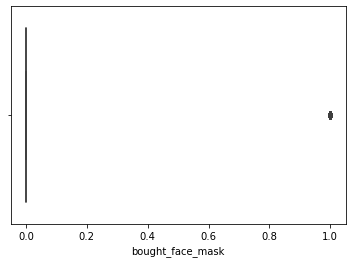

In [189]:
sns.boxplot(x="bought_face_mask",data=vac)
plt.show()

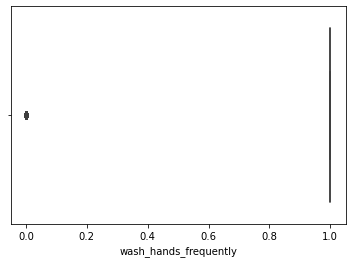

In [190]:
sns.boxplot(x="wash_hands_frequently",data=vac)
plt.show()

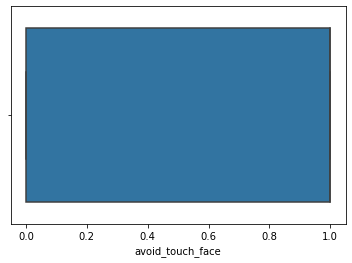

In [191]:
sns.boxplot(x="avoid_touch_face",data=vac)
plt.show()

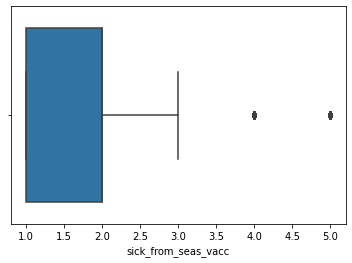

In [192]:
sns.boxplot(x="sick_from_seas_vacc",data=vac)
plt.show()

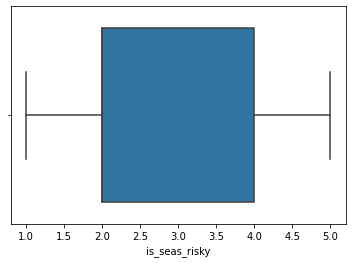

In [193]:
sns.boxplot(x="is_seas_risky",data=vac)
plt.show()

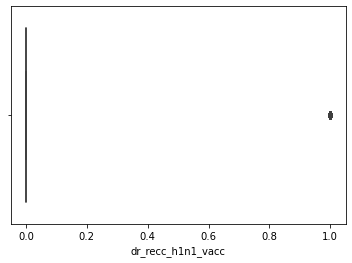

In [194]:
sns.boxplot(x="dr_recc_h1n1_vacc",data=vac)
plt.show()

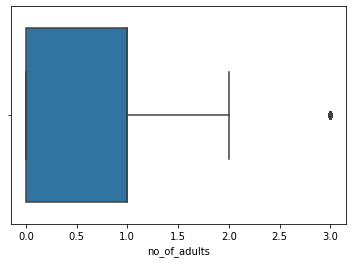

In [195]:
sns.boxplot(x="no_of_adults",data=vac)
plt.show()

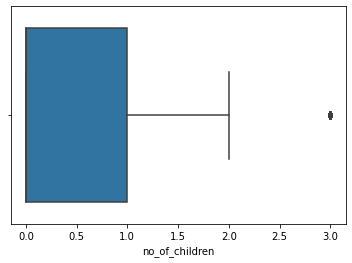

In [196]:
sns.boxplot(x="no_of_children",data=vac)
plt.show()

In [225]:
va=vacci.copy()

In [223]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  iqr=q3-q1
  lower_range=q1-1.5*iqr
  upper_range=q3+1.5*iqr
  return lower_range,upper_range

In [229]:
lowage,uppage=remove_outlier(vac['dr_recc_h1n1_vacc'])
vac['dr_recc_h1n1_vacc']=np.where(vac['dr_recc_h1n1_vacc']>uppage,uppage,vac['dr_recc_h1n1_vacc'])
vac['dr_recc_h1n1_vacc']=np.where(vac['dr_recc_h1n1_vacc']<lowage,lowage,vac['dr_recc_h1n1_vacc'])

In [230]:
lowage,uppage=remove_outlier(vac['antiviral_medication'])
vac['antiviral_medication']=np.where(vac['antiviral_medication']>uppage,uppage,vac['antiviral_medication'])
vac['antiviral_medication']=np.where(vac['antiviral_medication']<lowage,lowage,vac['antiviral_medication'])

In [231]:
lowage,uppage=remove_outlier(vac['bought_face_mask'])
vac['bought_face_mask']=np.where(vac['bought_face_mask']>uppage,uppage,vac['bought_face_mask'])
vac['bought_face_mask']=np.where(vac['bought_face_mask']<lowage,lowage,vac['bought_face_mask'])

In [232]:
lowage,uppage=remove_outlier(vac['wash_hands_frequently'])
vac['wash_hands_frequently']=np.where(vac['wash_hands_frequently']>uppage,uppage,vac['wash_hands_frequently'])
vac['wash_hands_frequently']=np.where(vac['wash_hands_frequently']<lowage,lowage,vac['wash_hands_frequently'])

In [233]:
lowage,uppage=remove_outlier(vac['cont_child_undr_6_mnths'])
vac['cont_child_undr_6_mnths']=np.where(vac['cont_child_undr_6_mnths']>uppage,uppage,vac['cont_child_undr_6_mnths'])
vac['cont_child_undr_6_mnths']=np.where(vac['cont_child_undr_6_mnths']<lowage,lowage,vac['cont_child_undr_6_mnths'])

In [234]:
lowage,uppage=remove_outlier(vac['is_health_worker'])
vac['is_health_worker']=np.where(vac['is_health_worker']>uppage,uppage,vac['is_health_worker'])
vac['is_health_worker']=np.where(vac['is_health_worker']<lowage,lowage,vac['is_health_worker'])

In [235]:
lowage,uppage=remove_outlier(vac['no_of_children'])
vac['no_of_children']=np.where(vac['no_of_children']>uppage,uppage,vac['no_of_children'])
vac['no_of_children']=np.where(vac['no_of_children']<lowage,lowage,vac['no_of_children'])

In [236]:
lowage,uppage=remove_outlier(vac['no_of_adults'])
vac['no_of_adults']=np.where(vac['no_of_adults']>uppage,uppage,vac['no_of_adults'])
vac['no_of_adults']=np.where(vac['no_of_adults']<lowage,lowage,vac['no_of_adults'])

In [237]:
lowage,uppage=remove_outlier(vac['has_health_insur'])
vac['has_health_insur']=np.where(vac['has_health_insur']>uppage,uppage,vac['has_health_insur'])
vac['has_health_insur']=np.where(vac['has_health_insur']<lowage,lowage,vac['has_health_insur'])

In [238]:
lowage,uppage=remove_outlier(vac['sick_from_seas_vacc'])
vac['sick_from_seas_vacc']=np.where(vac['sick_from_seas_vacc']>uppage,uppage,vac['sick_from_seas_vacc'])
vac['sick_from_seas_vacc']=np.where(vac['sick_from_seas_vacc']<lowage,lowage,vac['sick_from_seas_vacc'])

In [197]:
# it canremove all the outliers 
#q1=vac.quantile(0.25)
#q3=vac.quantile(0.75)
#iqr=q3-q1
#print("/n InternalQuantileRange=/n",iqr)
#vac_f=vac[~((vac < (q1-1.5*iqr)) | (vac > (q3+1.5*iqr))).any(axis=1)]
#vac_f.head(5)
#vac_f.shape

/n InternalQuantileRange=/n h1n1_worry                                1.0
h1n1_awareness                            1.0
antiviral_medication                      0.0
contact_avoidance                         1.0
bought_face_mask                          0.0
wash_hands_frequently                     0.0
avoid_large_gatherings                    1.0
reduced_outside_home_cont                 1.0
avoid_touch_face                          1.0
dr_recc_h1n1_vacc                         0.0
dr_recc_seasonal_vacc                     1.0
chronic_medic_condition                   1.0
cont_child_undr_6_mnths                   0.0
is_health_worker                          0.0
has_health_insur                          0.0
is_h1n1_vacc_effective                    2.0
is_h1n1_risky                             3.0
sick_from_h1n1_vacc                       3.0
is_seas_vacc_effective                    1.0
is_seas_risky                             2.0
sick_from_seas_vacc                       1.0
no_of_

(1064, 52)

In [ ]:
###succesfully remove all the outliers

In [239]:
vac.shape

(26707, 52)

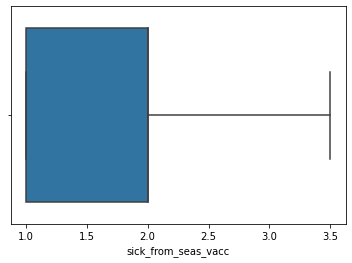

In [241]:
sns.boxplot(x="sick_from_seas_vacc",data=vac)
plt.show()

In [242]:
vac['antiviral_medication'] = vac['antiviral_medication'].apply(np.int64)
vac['bought_face_mask'] = vac['bought_face_mask'].apply(np.int64)
vac['wash_hands_frequently'] = vac['wash_hands_frequently'].apply(np.int64)
vac['dr_recc_h1n1_vacc'] = vac['dr_recc_h1n1_vacc'].apply(np.int64)

vac['cont_child_undr_6_mnths'] = vac['cont_child_undr_6_mnths'].apply(np.int64)
vac['is_health_worker'] = vac['is_health_worker'].apply(np.int64)

vac['has_health_insur'] = vac['has_health_insur'].apply(np.int64)
vac['sick_from_seas_vacc'] = vac['sick_from_seas_vacc'].apply(np.int64)

vac['no_of_adults'] = vac['no_of_adults'].apply(np.int64)
vac['no_of_children'] = vac['no_of_children'].apply(np.int64)

In [243]:
vac_f.dtypes

h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                        int64
contact_avoidance                         float64
bought_face_mask                            int64
wash_hands_frequently                       int64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                           int64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                     int64
is_health_worker                            int64
has_health_insur                            int64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


In [244]:
vac["h1n1_vaccine"].unique()

array([0, 1], dtype=int64)

In [245]:
## split into x and y
X=vac.drop('h1n1_vaccine',axis=1)
Y=vac['h1n1_vaccine']

In [246]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [247]:
model_1=DecisionTreeClassifier(max_depth=3)
model_1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [248]:
model_1.score(X_train,Y_train)

0.80539210441853

In [249]:
model_1.score(X_test,Y_test)

0.8108074379133907

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
model_2=LogisticRegression()
model_2.fit(X_train,Y_train)

LogisticRegression()

In [252]:
model_2.score(X_train,Y_train)

0.8144324382154702

In [253]:
model_2.score(X_test,Y_test)

0.8191688506177461

In [254]:
from sklearn.ensemble import BaggingClassifier

In [286]:
model_3=BaggingClassifier(n_estimators=100)
model_3.fit(X_train,Y_train)

BaggingClassifier(n_estimators=100)

In [287]:
model_3.score(X_train,Y_train)

0.9998930138012196

In [288]:
model_3.score(X_test,Y_test)

0.8129289903906153

In [265]:
from sklearn.ensemble import AdaBoostClassifier

In [267]:
model_4=AdaBoostClassifier(n_estimators=90)
model_4.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=90)

In [268]:
model_4.score(X_train,Y_train)

0.8153418209051032

In [269]:
model_4.score(X_test,Y_test)

0.8184200673904904

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
model_5=RandomForestClassifier(n_estimators=150)
model_5.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=150)

In [284]:
model_5.score(X_train,Y_train)

0.9998930138012196

In [285]:
model_5.score(X_test,Y_test)

0.819543242231374

In [275]:
Y_pred=model_2.predict(X_test)

In [279]:
# model evaluation
model_2.predict(X.iloc[460:,:])
round(model_2.score(X,Y),4)

0.8159

In [281]:
# model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8191688506177461

In [282]:
# model classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6330
           1       0.65      0.30      0.41      1683

    accuracy                           0.82      8013
   macro avg       0.74      0.63      0.65      8013
weighted avg       0.80      0.82      0.79      8013

